Introduction: 
Introduce the project, and your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.

The Metric: Describe your metric, and what features are you measuring. What datasets are you using?


The Best Neighborhood: Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.


Conclusion: Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.

In [1]:
print('test')

test


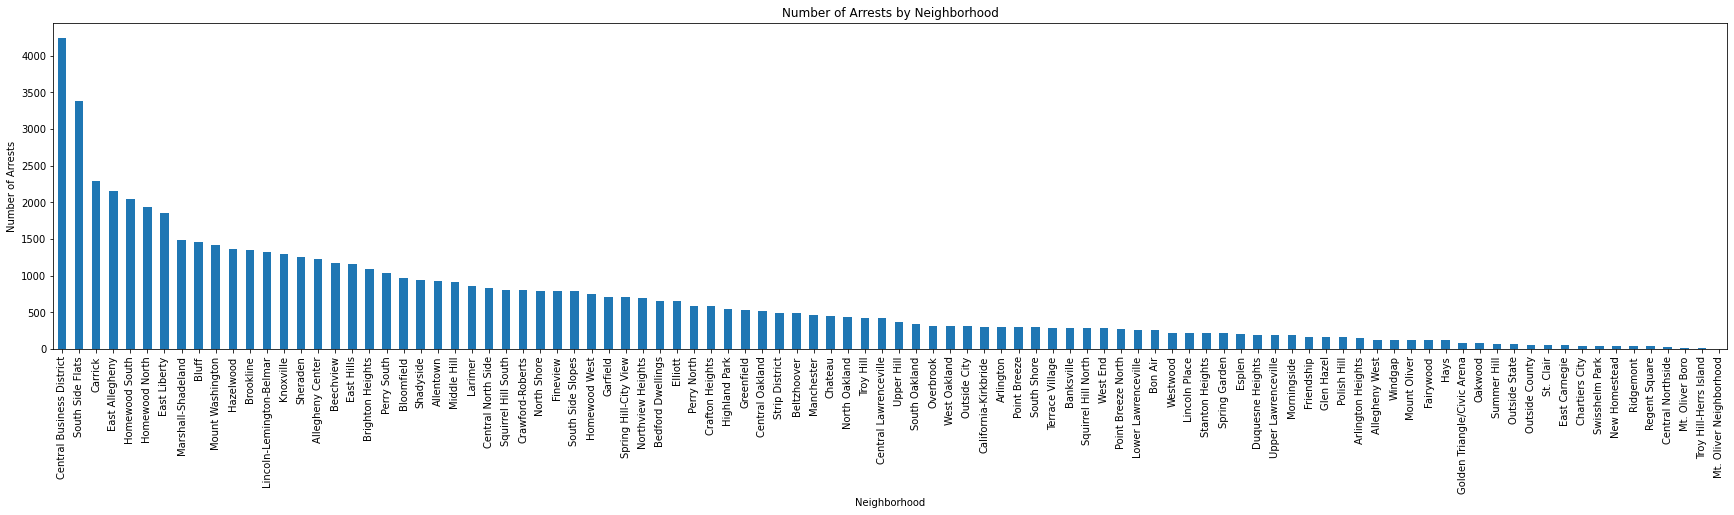

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("arrests.csv", sep=",")
df.head()

arrests_by_neighborhood = df['INCIDENTNEIGHBORHOOD'].value_counts()
arrests_by_neighborhood.plot(kind='bar', figsize=(30,6))
plt.title('Number of Arrests by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.show()

